In [ ]:
import pandas as pd

In [ ]:
# Load negative instances (non-cancer)
df_normal=pd.read_csv('primarysite_HeadandNeckregion_sampletype_SolidTissueNormal.csv')
df_normal.shape

(60498, 45)

In [ ]:
print(df_normal)

          id  TCGA-CV-6959-11  TCGA-CV-6962-11  TCGA-CV-7245-11  \
0          0           0.0000           0.0000           0.0000   
1          1           0.0000           0.0000           0.0000   
2          2           1.7409           0.0000           3.2480   
3          3          10.0184          10.1015           9.7170   
4          4           0.0000           0.0000           0.0000   
...      ...              ...              ...              ...   
60493  60493           0.0000           0.0000           0.9594   
60494  60494          12.5696          12.7580          12.2076   
60495  60495           3.0049           3.1965           3.3847   
60496  60496           0.0000           0.0000           0.0000   
60497  60497           0.0000           0.0000           0.0000   

       TCGA-CV-7261-11  TCGA-CV-7250-11  TCGA-CV-7434-11  TCGA-CV-7437-11  \
0               0.0000           0.0000           0.0000           0.0000   
1               0.0000           0.0000  

In [ ]:
df_normal=df_normal.T
print('before insert label at last column: ', df_normal.shape)
# Insert 'label' attribute with value 0
df_normal['label']=0
print('after insert label at last column: ', df_normal.shape)

before insert label at last column:  (45, 60498)
after insert label at last column:  (45, 60499)


In [ ]:
print(df_normal)

                      0    1       2        3    4        5       6    7  \
id               0.0000  1.0  2.0000   3.0000  4.0   5.0000  6.0000  7.0   
TCGA-CV-6959-11  0.0000  0.0  1.7409  10.0184  0.0   9.2564  3.3743  0.0   
TCGA-CV-6962-11  0.0000  0.0  0.0000  10.1015  0.0   8.2672  3.1965  0.0   
TCGA-CV-7245-11  0.0000  0.0  3.2480   9.7170  0.0   9.0315  0.0000  0.0   
TCGA-CV-7261-11  0.0000  0.0  0.0000   9.4075  0.0   8.5670  4.4678  0.0   
TCGA-CV-7250-11  0.0000  0.0  3.2555   9.5450  0.0   9.3509  3.6732  0.0   
TCGA-CV-7434-11  0.0000  0.0  0.0000   9.7098  0.0   9.2921  2.3269  0.0   
TCGA-CV-7437-11  0.0000  0.0  0.5906   9.8561  0.0   8.5962  3.4076  0.0   
TCGA-CV-7423-11  0.0000  0.0  0.0000  10.4503  0.0   9.2061  2.9075  0.0   
TCGA-CV-7103-11  0.0000  0.0  0.0000   9.7203  0.0   9.5027  3.4994  0.0   
TCGA-CV-7101-11  0.0000  0.0  0.7628   9.8148  0.0   8.2940  5.9616  0.0   
TCGA-CV-7238-11  0.0000  0.0  3.8053   9.5267  0.0   9.6464  2.4132  0.0   
TCGA-CV-7091

In [ ]:
# Load positive instances (cancer)
df_abnormal=pd.read_csv('primarysite_HeadandNeckregion_sampletype_PrimaryTumor.csv')
print(df_abnormal.shape)
df_abnormal=df_abnormal.T
print('before insert label at last column: ', df_abnormal.shape)
# Insert 'label' attribute with value 1
df_abnormal['label']=1
print('after insert label at last column: ', df_abnormal.shape)

(60498, 519)
before insert label at last column:  (519, 60498)
after insert label at last column:  (519, 60499)


In [ ]:
# Find common attributes for both classes that
# only have zero values

import numpy as np

aux_abnormal=df_abnormal.iloc[1:,]
aux_abnormal_cols=aux_abnormal.columns[(aux_abnormal == 0).all()]
print(aux_abnormal_cols)

aux_normal=df_normal.iloc[1:,]
aux_normal_cols=aux_normal.columns[(aux_normal == 0).all()]
print(aux_normal_cols)

# print(np.where(aux_normal_cols=='label'))
# Delete the 'label' column here, as it only has zero
# values because it is the negative class label
aux_normal_cols = aux_normal_cols.delete(18742)

comun = np.intersect1d(aux_abnormal_cols, aux_normal_cols)
print(comun, comun.size)

Index([    4,     7,    19,    37,    66,    76,    88,    96,   100,   104,
       ...
       60445, 60451, 60457, 60460, 60461, 60463, 60474, 60478, 60484, 60496],
      dtype='object', length=8681)
Index([      1,       4,       7,      10,      19,      21,      26,      27,
            29,      37,
       ...
         60478,   60479,   60480,   60482,   60484,   60485,   60490,   60496,
         60497, 'label'],
      dtype='object', length=18743)
[4 7 19 ... 60478 60484 60496] 8589


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Delete the first row for both sets, it only 
# has identifiers that are not useful here
df_normal = df_normal.iloc[1:,]
df_normal = df_normal.drop(comun, axis=1)
df_abnormal = df_abnormal.iloc[1:,]
df_abnormal = df_abnormal.drop(comun, axis=1)

In [ ]:
# Concatenate both datasets
data = pd.concat([df_normal,df_abnormal], ignore_index=True)
data = data.sample(n=data.shape[0], random_state=2)
# Number of trees for Random Forest
ntrees=100

# Selecting the last column as label
Y= data['label']
X= data.iloc[:,:-1] 
X = np.asarray(X) 
Y = np.asarray(Y)

# Training and test sets
test_size = int(np.floor(0.30*X.shape[0]) )
trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = Y[:-test_size], Y[-test_size:]
print(trainY.shape,testY.shape)

(394,) (168,)


In [ ]:
# Normalize train and test set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

In [ ]:
# Train first Random Forest
from sklearn import preprocessing

clf=RandomForestRegressor(n_estimators=ntrees, random_state=50)

clf.fit(trainX,trainY)
clf.score(testX, testY)

0.5667513924050633

test 0s number:   10
test 1s number:   158


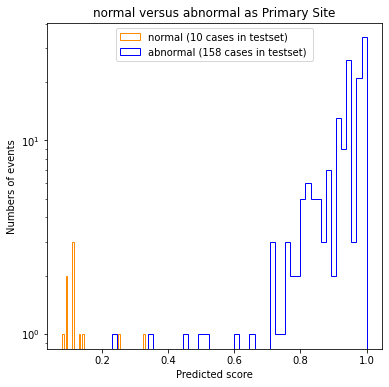

In [ ]:
# Visualize Random Forest predictions
pred = clf.predict(testX)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))# 6,6
plt.figure(1) 
plt.style.use('seaborn-deep')  

c=np.where(testY==0)
print("test 0s number:  ",len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='darkorange', label= "normal (%d cases in testset) " % (len(c[0]) ))
c=np.where(testY==1)
print("test 1s number:  ", len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='blue', label= "abnormal (%d cases in testset) " % (len(c[0]) ))
plt.ylabel('Numbers of events')
plt.xlabel('Predicted score')
plt.yscale("log")
title="normal versus abnormal as Primary Site"
plt.title(title)
plt.legend(loc='upper center')

In [ ]:
indexes = (-clf.feature_importances_).argsort()[:5000]

In [ ]:
# Keep the 5000 important attributes
new_normal = df_normal.iloc[:, indexes]
new_normal['label'] = 0

new_abnormal = df_abnormal.iloc[:, indexes]
new_abnormal['label'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Concatenate both sets again
new_data = pd.concat([new_normal,new_abnormal], ignore_index=True)
new_data = new_data.sample(n=new_data.shape[0],random_state=2)
# Some parameters
ntrees=100

# Selecting the last column as label
new_Y= new_data['label']
new_X= new_data.iloc[:,:-1] 
new_X = np.asarray(new_X) 
new_Y = np.asarray(new_Y)

# Training and test sets
test_size = int(np.floor(0.30*new_X.shape[0]) )
new_trainX, new_testX = new_X[:-test_size], new_X[-test_size:]
new_trainY, new_testY = new_Y[:-test_size], new_Y[-test_size:]
print(new_trainY.shape,new_testY.shape)

(394,) (168,)


In [ ]:
# Normalize the new train/test sets
new_trainX = scaler.fit_transform(new_trainX)
new_testX = scaler.fit_transform(new_testX)

In [ ]:
new_clf=RandomForestRegressor(n_estimators=ntrees, random_state=8) #random_state=50
# Train the new classifier using the reduced dataset
new_clf.fit(new_trainX,new_trainY)
new_clf.score(new_testX, new_testY)

0.6384916455696203

test 0s number:   10
test 1s number:   158


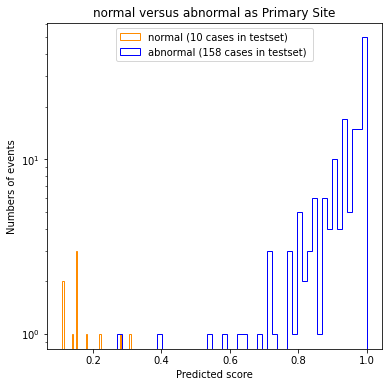

In [ ]:
# Show the new predictions
pred = new_clf.predict(new_testX)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))# 6,6
plt.figure(1) 
plt.style.use('seaborn-deep')  

c=np.where(testY==0)
print("test 0s number:  ",len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='darkorange', label= "normal (%d cases in testset) " % (len(c[0]) ))
c=np.where(testY==1)
print("test 1s number:  ", len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='blue', label= "abnormal (%d cases in testset) " % (len(c[0]) ))
plt.ylabel('Numbers of events')
plt.xlabel('Predicted score')
plt.yscale("log")
title="normal versus abnormal as Primary Site"
plt.title(title)
plt.legend(loc='upper center')

**VAE**

In [ ]:
from tensorflow import keras
from keras.layers.merge import concatenate as concat
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy, BinaryFocalCrossentropy
from tensorflow.keras.metrics import binary_focal_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
def sampling(args):
    """Reparameterization trick by sampling 
        fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    # K is the keras backend
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
# build encoder model
inputs = Input(shape=5000, name='encoder_input')
x = Dense(4000, activation='relu')(inputs)
x = Dense(3000, activation='relu')(x)
z_mean = Dense(2000, name='z_mean')(x)
z_log_var = Dense(2000, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary 
# with the TensorFlow backend
z = Lambda(sampling,
           output_shape=(2000,), 
           name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 5000)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 4000)         20004000    ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 3000)         12003000    ['dense[0][0]']                  
                                                                                                  
 z_mean (Dense)                 (None, 2000)         6002000     ['dense_1[0][0]']                
                                                                                            

In [ ]:
# build decoder model
latent_inputs = Input(shape=(2000,), name='z_sampling')
x = Dense(3000, activation='relu')(latent_inputs)
x = Dense(4000, activation='relu')(x)
outputs = Dense(5000, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2000)]            0         
                                                                 
 dense_2 (Dense)             (None, 3000)              6003000   
                                                                 
 dense_3 (Dense)             (None, 4000)              12004000  
                                                                 
 dense_4 (Dense)             (None, 5000)              20005000  
                                                                 
Total params: 38,012,000
Trainable params: 38,012,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# instantiate VAE model

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = binary_crossentropy(inputs,outputs)
reconstruction_loss *= 10000
# loss = BinaryFocalCrossentropy(gamma=10)
# reconstruction_loss = loss(inputs,outputs)
# reconstruction_loss *= 5000
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(keras.optimizers.Adam(learning_rate=0.0001))
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 5000)]       0           []                               
                                                                                                  
 encoder (Functional)           [(None, 2000),       44011000    ['encoder_input[0][0]']          
                                 (None, 2000),                                                    
                                 (None, 2000)]                                                    
                                                                                                  
 decoder (Functional)           (None, 5000)         38012000    ['encoder[0][2]']                
                                                                                            

In [ ]:
loss_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# save_callback = keras.callbacks.ModelCheckpoint(filepath='training_2d.ckpt',save_best_only=True,save_weights_only=True)
vae.fit(new_trainX, epochs=1000, batch_size=12, validation_data=(new_testX, None), callbacks=[loss_callback])

Epoch 1/1000
33/33 [==============================] - 5s 32ms/step - loss: 4689.4907 - val_loss: 4366.7388
Epoch 2/1000
33/33 [==============================] - 1s 26ms/step - loss: 4129.0483 - val_loss: 4306.0869
Epoch 3/1000
33/33 [==============================] - 1s 26ms/step - loss: 4105.6919 - val_loss: 4289.5151
Epoch 4/1000
33/33 [==============================] - 1s 25ms/step - loss: 4094.7585 - val_loss: 4282.3882
Epoch 5/1000
33/33 [==============================] - 1s 26ms/step - loss: 4089.8735 - val_loss: 4278.1040
Epoch 6/1000
33/33 [==============================] - 1s 26ms/step - loss: 4082.5198 - val_loss: 4266.7319
Epoch 7/1000
33/33 [==============================] - 1s 25ms/step - loss: 4075.7097 - val_loss: 4262.8931
Epoch 8/1000
33/33 [==============================] - 1s 25ms/step - loss: 4070.7783 - val_loss: 4262.9854
Epoch 9/1000
33/33 [==============================] - 1s 26ms/step - loss: 4064.6382 - val_loss: 4267.2002
Epoch 10/1000
33/33 [================

In [ ]:
valores = vae.predict(new_testX)
print("**VALORES PREDICHOS**")
print(valores)
print("----------------------------------------------")
print("**VALORES REALES**")
print(new_testX)
print("----------------------------------------------")
pred=new_clf.predict(valores)
print(new_clf.score(valores, new_testY))
print("----------------------------------------------")
print(pred)

**VALORES PREDICHOS**
[[0.580048   0.6197334  0.7448347  ... 0.40438518 0.6206912  0.24336436]
 [0.44855613 0.8221086  0.7617098  ... 0.4255959  0.6759032  0.6823807 ]
 [0.66135037 0.6262951  0.8285002  ... 0.4471318  0.5335722  0.1898773 ]
 ...
 [0.65657437 0.7248425  0.7251687  ... 0.3881248  0.6260458  0.1739411 ]
 [0.6203141  0.7022882  0.823741   ... 0.44460383 0.5886869  0.41904858]
 [0.32641408 0.66535646 0.5795781  ... 0.4323386  0.6716742  0.42660877]]
----------------------------------------------
**VALORES REALES**
[[0.36609192 0.46696794 0.48604534 ... 0.52957399 0.78520274 0.        ]
 [0.67204932 0.79611036 0.57763465 ... 0.42839839 0.85465165 0.49945524]
 [0.99033791 0.64363713 0.84747743 ... 0.42306652 0.39275375 0.        ]
 ...
 [0.53541878 0.57301869 0.46194039 ... 0.         0.64772708 0.        ]
 [0.7352533  0.8364311  0.81432721 ... 0.52212236 0.5711335  0.15472054]
 [0.25022687 0.82612671 0.6110848  ... 0.57879368 0.43729789 0.07364132]]
------------------------

test 0s number:   10
test 1s number:   158


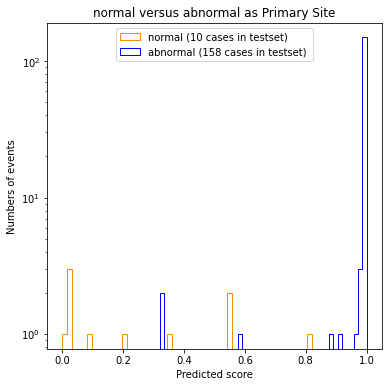

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))# 6,6
plt.figure(1) 
plt.style.use('seaborn-deep')  

c=np.where(new_testY==0)
print("test 0s number:  ",len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='darkorange', label= "normal (%d cases in testset) " % (len(c[0]) ))
c=np.where(new_testY==1)
print("test 1s number:  ", len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='blue', label= "abnormal (%d cases in testset) " % (len(c[0]) ))
plt.ylabel('Numbers of events')
plt.xlabel('Predicted score')
plt.yscale("log")
title="normal versus abnormal as Primary Site"
plt.title(title)
plt.legend(loc='upper center')

In [ ]:
# z_mean_train, _, _ = encoder.predict(new_trainX)

# plt.figure(figsize=(12, 10))
# zero_index = np.where(new_trainY == 0)
# one_index = np.where(new_trainY == 1)
# plt.scatter(z_mean_train[one_index, 0], z_mean_train[one_index, 1], c='yellow')
# plt.scatter(z_mean_train[zero_index, 0], z_mean_train[zero_index, 1], c='purple')
# plt.colorbar()
# plt.xlabel("z[0]")
# plt.ylabel("z[1]")
# plt.show()

In [ ]:
# z_mean_test, _, _ = encoder.predict(new_testX)
# plt.figure(figsize=(12, 10))
# zero_index = np.where(new_testY == 0)
# one_index = np.where(new_testY == 1)
# plt.scatter(z_mean_test[one_index, 0], z_mean_test[one_index, 1], c='yellow')
# plt.scatter(z_mean_test[zero_index, 0], z_mean_test[zero_index, 1], c='purple')
# plt.colorbar()
# plt.xlabel("z[0]")
# plt.ylabel("z[1]")
# plt.show()

In [ ]:
# newer_trainY = np.expand_dims(new_trainY,axis=1)
# train_set = np.concatenate((z_mean_train,newer_trainY), axis=1)
# newer_testY = np.expand_dims(new_testY,axis=1)
# test_set = np.concatenate((z_mean_test,newer_testY), axis=1)
# dataset_2d = np.concatenate((train_set,test_set))
# np.savetxt("dataset_2d.csv", dataset_2d, delimiter=',')

In [ ]:
np.savetxt("dataset1.csv", new_data, delimiter=',')
new_data2 = scaler.fit_transform(new_data)
np.savetxt("dataset2.csv", new_data2, delimiter=',')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
z_mean_new, _, _ = encoder.predict(new_X)
newer_Y = np.expand_dims(new_Y,axis=1)
new_set = np.concatenate((z_mean_new,newer_Y), axis=1)
np.savetxt("new_dataset.csv", new_set, delimiter=',')
new_set_normalized = scaler.fit_transform(new_set)
np.savetxt("new_dataset_normalized.csv", new_set_normalized, delimiter=',')